In [6]:
import pandas as pd
import numpy as np

In [7]:
pd.set_option('display.max_columns', None)
three_df = pd.read_csv('ThreeSubjectheadings.csv')
one_df = pd.read_csv('OneSubjectHeading.csv')

In [8]:
# rename columns
one_df = one_df.rename(columns={'Title (Complete)' : 'Title',
                   'Permanent Call Number' : 'Call Number',
               'Loan Date' : 'Date'})

#convert to string and change year to whole year
one_df['Date'] = one_df['Date'].astype(str).str[-4:]
one_df.head(5)

,Item Loan Id,Date,In House Loan Indicator,Barcode,Call Number,Circulation Library Code,Owning Library Code,Title,Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9913933350001701,NaN
1,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9930689970001701,NaN
2,2252965815260001701,2018,N,31951P012191854,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
3,2252965816190001701,2018,N,31951P012191862,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
4,2252965817370001701,2018,N,31951P012055993,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN


In [9]:
# rename columns
three_df = three_df.rename(columns={'Title (Complete)' : 'Title',
                   'Permanent Call Number' : 'Call Number',
               'Loan Date' : 'Date'})

#convert to string and change year to whole year
three_df['Date'] = three_df['Date'].astype(str).str[-4:]
three_df.head(5)

,Item Loan Id,Date,In House Loan Indicator,Barcode,Call Number,Circulation Library Code,Owning Library Code,Title,Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9.913933e+15,NaN
1,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Metropolitan areas,9.913933e+15,NaN
2,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Urbanization,9.913933e+15,NaN
3,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9.930690e+15,NaN
4,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Historic buildings--United States,9.930690e+15,NaN


In [10]:
# Create a mask to subset data by year
def Mask(year, df):
    mask_year = df[(df.Date == year)]
    return(mask_year)

In [11]:
def DiffPerc(df, sort_year, order):
    # This function inputs a dataframe, and then groupsby count values for each subject and year. 
    # It then converts those subject heading counts into a percentage of all counts for a year by dividing each subject heading by total checkout counts for the year.
    # It then merges all of these new columns into a new dataframe 
    
    # use mask function to subset by year
    subset_2018 = Mask('2018', df)
    subset_2019 = Mask('2019', df)
    subset_2020 = Mask('2020', df)
    subset_2021 = Mask('2021', df)
    subset_2022 = Mask('2022', df)
    subset_2023 = Mask('2023', df)
    
    # group by counts for every year and subject
    counts_2018 = subset_2018.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2019 = subset_2019.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2020 = subset_2020.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2021 = subset_2021.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2022 = subset_2022.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2023 = subset_2023.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    
     # create total checkouts variable for every year
    checkouts2018 = counts_2018['Counts'].sum()
    checkouts2019 = counts_2019['Counts'].sum()
    checkouts2020 = counts_2020['Counts'].sum()
    checkouts2021 = counts_2021['Counts'].sum()
    checkouts2022 = counts_2022['Counts'].sum()
    checkouts2023 = counts_2023['Counts'].sum()

    # create counts variable for every year

    counts_2018['Subj %'] = counts_2018['Counts'] / checkouts2018

    counts_2019['Subj %'] = counts_2019['Counts'] / checkouts2019
 
    counts_2020['Subj %'] = counts_2020['Counts'] / checkouts2020
 
    counts_2021['Subj %'] = counts_2021['Counts'] / checkouts2021
 
    counts_2022['Subj %'] = counts_2022['Counts'] / checkouts2022
 
    counts_2023['Subj %'] = counts_2023['Counts'] / checkouts2023
    
    # merge columns into a singular dataframe
    merged_df = pd.merge(counts_2018, counts_2019, how='left', on='Subjects')
    merged_df = merged_df.rename(columns={'Date_x' : 'Date 2018',
                    'Counts_x' : 'Counts 2018',
                'Subj %_x' : 'Subj % 2018',
                'Date_y' : 'Date 2019',
                    'Counts_y' : 'Counts 2019',
                'Subj %_y' : 'Subj % 2019'})
    
    merged_df2 = pd.merge(merged_df, counts_2020, how='left', on='Subjects')
    merged_df2 = merged_df2.rename(columns={'Date' : 'Date 2020',
                    'Counts' : 'Counts 2020',
                'Subj %' : 'Subj % 2020'})
    
    merged_df3 = pd.merge(merged_df2, counts_2021, how='left', on='Subjects')
    merged_df3 = merged_df3.rename(columns={'Date' : 'Date 2021',
                    'Counts' : 'Counts 2021',
                'Subj %' : 'Subj % 2021'})
    
    merged_df4 = pd.merge(merged_df3, counts_2022, how='left', on='Subjects')
    merged_df4 = merged_df4.rename(columns={'Date' : 'Date 2022',
                    'Counts' : 'Counts 2022',
                'Subj %' : 'Subj % 2022'})
    
    merged_df5 = pd.merge(merged_df4, counts_2023, how='left', on='Subjects')
    merged_df5 = merged_df5.rename(columns={'Date' : 'Date 2023',
                    'Counts' : 'Counts 2023',
                'Subj %' : 'Subj % 2023'})
    
    # subset df
    merged_df5 =merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023']]

    # create new column that measures subject heading growth as a decimal by substracting subject % 2023 -  subject # 2018
    merged_df5['2023 Diff 2018'] = merged_df5['Subj % 2023'] - merged_df5['Subj % 2018']
    merged_df5['2023 Diff 2020'] = merged_df5['Subj % 2023'] - merged_df5['Subj % 2020']
    merged_df5['2022 Diff 2018'] = merged_df5['Subj % 2022'] - merged_df5['Subj % 2018']
    merged_df5['2021 Diff 2018'] = merged_df5['Subj % 2021'] - merged_df5['Subj % 2018']
    merged_df5['2020 Diff 2018'] = merged_df5['Subj % 2020'] - merged_df5['Subj % 2018']
    merged_df5['2019 Diff 2018'] = merged_df5['Subj % 2019'] - merged_df5['Subj % 2018']

    # function to enable a sort year and ascending or deescending
    merged_df5 = merged_df5.sort_values(by=[sort_year], ascending=[order]).reset_index(drop=True)

    # reorder the columns
    merged_df5 = merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023', 
                             '2019 Diff 2018', '2020 Diff 2018','2021 Diff 2018', '2022 Diff 2018',  '2023 Diff 2018', '2023 Diff 2020']]

  
    return merged_df5

In [12]:
# Utilized DiffPerc function to create dataframe that generates growth statistics for each subject heading 
# This dataset is from the version that utilizes the first three subject headings
# Sorted  by 2023 Diff 2018 on all there subjects (largest to smallest positive change)
# Percentages are not actually a percentage. It is a decimal.
diff_three_df2023 = DiffPerc(three_df, '2023 Diff 2018', False)
diff_three_df2023.head()


,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018,2023 Diff 2020
0,Architecture--Espagne--20e siècle--Périodiques.,0.007502,0.011714,0.004845,0.009615,0.019767,0.015130,0.004213,-0.002657,2.113822e-03,0.012266,0.007629,0.010286
1,Architecture--Spain--Periodicals.,0.007571,0.011788,0.005046,0.009615,0.019767,0.015130,0.004217,-0.002525,2.044363e-03,0.012196,0.007559,0.010084
2,"Architecture, Domestic--Designs and plans",0.001875,0.003781,0.002826,0.004423,0.003065,0.005147,0.001906,0.000951,2.547686e-03,0.001189,0.003272,0.002321
3,Architecture domestique.,0.000208,0.001186,0.000202,0.001346,0.000460,0.003276,0.000978,-0.000007,1.137777e-03,0.000251,0.003067,0.003074
4,"Architecture, Modern--20th century--Designs an...",0.002501,0.003336,0.001413,0.002500,0.001992,0.005459,0.000836,-0.001088,-5.209419e-07,-0.000508,0.002959,0.004046


In [13]:
# Utilized DiffPerc function to create dataframe that generates growth statistics for each subject heading 
# This dataset is from the version that utilizes only the first subject heading
# Sorted  by 2023 Diff 2018 on all there subjects (largest to smallest positive change)
# We didn't end up using this one.
diff_one_df2023 = DiffPerc(one_df, '2023 Diff 2018', False)
diff_one_df2023.head()

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018,2023 Diff 2020
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.010577,-0.005934,0.005545,0.031030,0.019113,0.025046
1,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.002929,0.000643,0.004361,0.001846,0.008098,0.007455
2,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.001582,0.009189,-0.001021,-0.000452,0.005792,-0.003397
3,Landscape architecture,0.003740,0.005858,0.004030,0.007222,0.006531,0.007761,0.002118,0.000291,0.003482,0.002791,0.004021,0.003731
4,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.001490,-0.001712,-0.000312,0.003427,0.003489,0.005201


In [21]:
# Compare Three subject heading vs one subject heading data
three2020 = diff_three_df2023 
three2020 = three2020[['Subjects', 'Subj % 2020']]

# rename columns and sort values
three2020 = three2020.rename(columns={'Subj % 2020': 'Three Subjects % 2020'})
three2020 = three2020.sort_values('Three Subjects % 2020', ascending=False).reset_index(drop=True)

one2020 = diff_one_df2023
one2020 = one2020[['Subjects', 'Subj % 2020']]

# rename columns and sort values 
one2020 = one2020.rename(columns={'Subjects': 'One Subjects', 'Subj % 2020': 'One Subjects % 2020'})
one2020 = one2020.sort_values('One Subjects % 2020', ascending=False).reset_index(drop=True)

#comp_df = pd.merge(three2023, one2023, how='left', on='Subjects')
comp_df2020 = pd.concat([three2020, one2020], axis=1)
comp_df2020 = comp_df2020.head(15)
comp_df2020

,Subjects,Three Subjects % 2020,One Subjects,One Subjects % 2020
0,"Architecture, Modern--20th century",0.016149,"Architecture, Modern--20th century",0.015617
1,City planning,0.011506,City planning,0.015617
2,Architecture--Environmental aspects,0.008074,Architecture--Environmental aspects,0.013098
3,Architecture--Periodicals,0.007872,Architecture--Spain--Periodicals.,0.012594
4,"Architecture, Modern--21st century",0.007065,"Architecture, Domestic--Japan",0.009068
5,Architectural design,0.006056,Architecture and society,0.008060
6,Architecture and society,0.006056,Architectural design,0.007053
7,Architecture--Human factors,0.006056,Architecture--Philosophy,0.006549
8,Sustainable architecture,0.005854,Architecture--Japan--History--20th century,0.005542
9,Architecture,0.005450,Architecture--Periodicals,0.005038


<Axes: title={'center': 'Top 20 Subject Headings Growth From 2018 to 2023'}, ylabel='Subjects'>

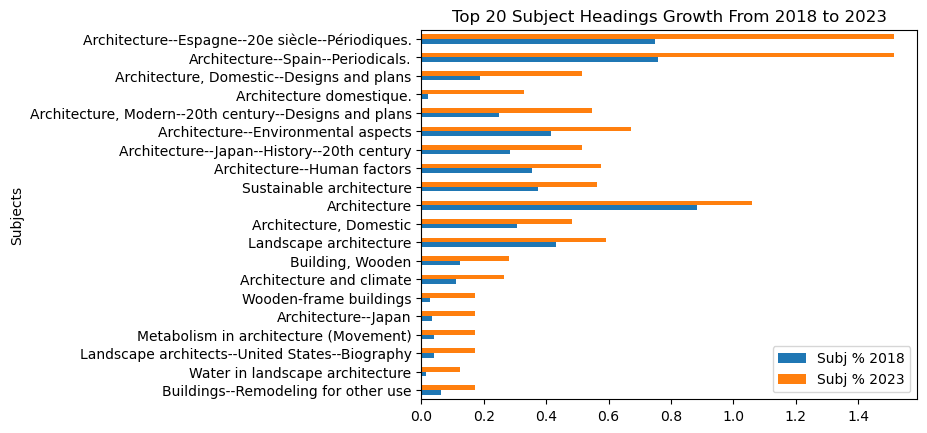

In [14]:
# plotting sorted  by 2023 Diff 2018 on all three subjects (largest to smallest positive change)
ThreeSHChange2018 = diff_three_df2023.rename(columns={"2023 Diff 2018": "2023 Growth %"})
ThreeSHChange2018 = ThreeSHChange2018.sort_values('2023 Growth %', ascending=False)

# normalize decimals to percentage
ThreeSHChange2018['Subj % 2018'] = ThreeSHChange2018['Subj % 2018'] * 100
ThreeSHChange2018['Subj % 2023'] = ThreeSHChange2018['Subj % 2023'] * 100

# limit to top 20 growing subject headings and select 2018 and 2023 years only
ThreeSHChange2018 = ThreeSHChange2018.head(20).sort_values('2023 Growth %', ascending=True).plot(x="Subjects", y=['Subj % 2018', 'Subj % 2023'], kind="barh") 
ThreeSHChange2018.set_title('Top 20 Subject Headings Growth From 2018 to 2023')

ThreeSHChange2018

<Axes: title={'center': 'Top 20 Subject Headings Growth From 2020 to 2023'}, ylabel='Subjects'>

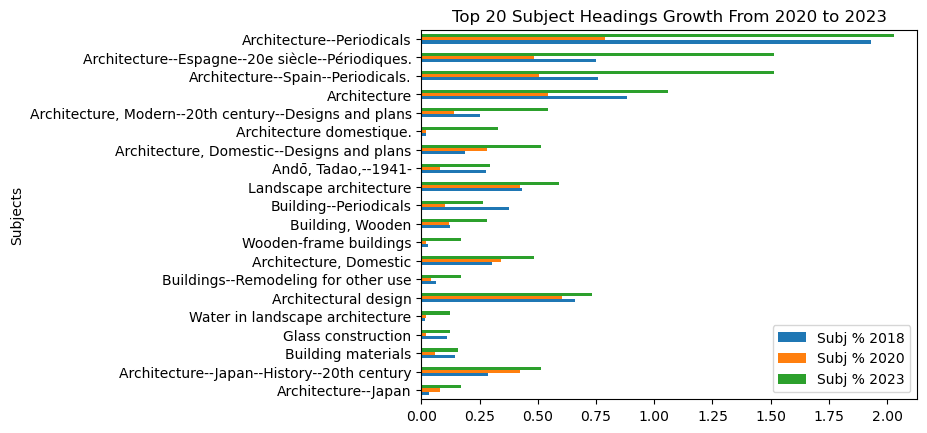

In [15]:
# plotting sorted by 2023 Diff 2018 on all three subjects (largest to smallest positive change)
ThreeSHGrowth2023 = diff_three_df2023.rename(columns={"2023 Diff 2020": "2023 Growth %"})
ThreeSHGrowth2023 = ThreeSHGrowth2023.sort_values('2023 Growth %', ascending=False)

# normalize decimals to percentage
ThreeSHGrowth2023['Subj % 2018'] = ThreeSHGrowth2023['Subj % 2018'] * 100
ThreeSHGrowth2023['Subj % 2020'] = ThreeSHGrowth2023['Subj % 2020'] * 100
ThreeSHGrowth2023['Subj % 2023'] = ThreeSHGrowth2023['Subj % 2023'] * 100

# limit to top 20 growing subject headings and select 2018, 2020, and 2023 years
ThreeSHGrowth2023 = ThreeSHGrowth2023.head(20).sort_values('2023 Growth %', ascending=True).plot(x="Subjects", y=['Subj % 2018', 'Subj % 2020', 'Subj % 2023'], kind="barh") 
ThreeSHGrowth2023.set_title('Top 20 Subject Headings Growth From 2020 to 2023')

ThreeSHGrowth2023


<Axes: title={'center': 'Top 20 Decreasing Subject Headings From 2020 to 2023'}, ylabel='Subjects'>

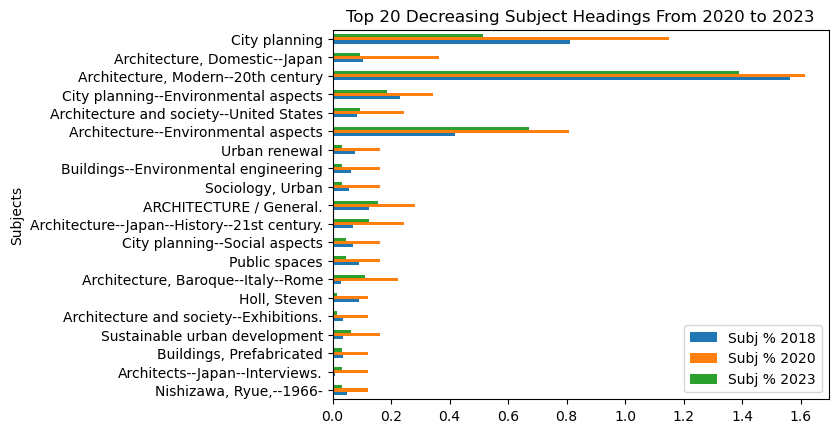

In [16]:
# plotting sorted  by 2023 Diff 2018 on all there subjects (largest to smallest negative change)
ThreeSHDec2020 = diff_three_df2023.rename(columns={"2023 Diff 2020": "2023 Decline %"})
ThreeSHDec2020 = ThreeSHDec2020.sort_values('2023 Decline %', ascending=True)

# normalize decimals to percentage
ThreeSHDec2020['Subj % 2018'] = ThreeSHDec2020['Subj % 2018'] * 100
ThreeSHDec2020['Subj % 2020'] = ThreeSHDec2020['Subj % 2020'] * 100
ThreeSHDec2020['Subj % 2023'] = ThreeSHDec2020['Subj % 2023'] * 100

# limit to top 20 decreasing subject headings and select 2018, 2020, and 2023 years
ThreeSHDec2020 = ThreeSHDec2020.head(20).sort_values('2023 Decline %', ascending=False).plot(x="Subjects", y=['Subj % 2018', 'Subj % 2020', 'Subj % 2023'], kind="barh") 
ThreeSHDec2020.set_title('Top 20 Decreasing Subject Headings From 2020 to 2023')

ThreeSHDec2020

In [17]:
# Look up how much the subject headingg Architects--Japan--Interviews. grew from 2018 to 2020
print('The number of Japanese interviews in 2018:', len(three_df[(three_df['Subjects'] == 'Architects--Japan--Interviews.') & (three_df["Date"] == '2018')])), print('The number of Japanese interviews in 2020:',  len(three_df[(three_df['Subjects'] == 'Architects--Japan--Interviews.') & (three_df["Date"] == '2020')]))

The number of Japanese interviews in 2018: 1
The number of Japanese interviews in 2020: 6


(None, None)

In [18]:
# look up Buildings--Remodeling for other use to see how much it grew from 2020 to 2023 
diff_three_df2023[(diff_three_df2023['Subjects'] == 'Buildings--Remodeling for other use')]

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018,2023 Diff 2020
19,Buildings--Remodeling for other use,0.000625,0.000371,0.000404,0.000385,0.002145,0.001716,-0.000254,-0.000221,-0.000241,0.00152,0.001091,0.001312
